<!-- <div style='float:right'><img width=200 src="hse-logo.jpg" alt="HSE logo"></img></div> -->
<div style='float:left'><img width=400 src="python_logo.png" alt="Python"></img></div>

<div style='float:right'>

<h1 align='center'>Язык программирования Python</h1>

<h2 align='right'>Бобер Станислав Алексеевич</h2>
<h3 align='right'>Ст. преп. Департамента Прикладной Математики</h3>
<h3 align='right'>e-mail: sbober@hse.ru, stas.bober@gmail.com</h3>
</div>

# Семинар 7

Теоретическая часть:
[Лекция 7](https://github.com/BoberSA/PythonCourse/blob/master/Lecture_7/Lecture_7.ipynb)

# Темы семинара:

### 0. Объектно-ориентированное программирование в Python

### Задание 0. Классы

Создать класс Point, от которого унаследован Shape, а от него - Circle и Square.

Point - точка на плоскости, отображаемая определенным маркером '.'.

Shape - абстрактная фигура, не имеющая формы, которая также отображается на графике маркером 'x'.

Circle и Square отображаются на графике в виде круга и квадрата заданных размеров.

Вся иерархия должна:
1. реализовывать метод draw(self), который отрисовывает объект при помощи matplotlib; [0.2]
2. (кроме Point) реализовывать метод is_inside(self, point), где point - объект класса Point. Метод проверяет, лежит ли точка внутри фигуры; [0.2]
3. создать несколько объектов классов Circle, Square, отрисовать и проверить несколько точек на принадлежность им; [0.2]
4. создать класс Union, унаследованный от Shape, являющий объединением фигур-наследников класса Shape из заданного списка, реализующий обе функции (draw, is_inside); [0.2]
5. создать класс Intersection, унаследованный от Shape, являющий пересечением фигур-наследников класса Shape из заданного списка, реализующий обе функции (draw, is_inside); [0.2]


In [131]:
import matplotlib.patches as patches
class Point:
        
    x_bounds = (-1, 1)
    y_bounds = (-1, 1)
    
    def __init__ (self, x, y):
        self.x = x
        self.y = y
        
    def draw(self, ax):
        ax.scatter(self.x, self.y)
        Point.reshape_bound(self.x, self.x, self.y, self.y, ax)

        
    @staticmethod
    def reshape_bound(x_left, x_right, y_bottom, y_top, ax):
        new_x_left = min(Shape.x_bounds[0], x_left)
        new_x_right = max(Shape.x_bounds[1], x_right)
        new_y_bottom = min(Shape.y_bounds[0], y_bottom)
        new_y_top = max(Shape.y_bounds[1], y_top)
        
        Shape.x_bounds = (new_x_left, new_x_right)
        Shape.y_bounds = (new_y_bottom, new_y_top)
        ax.set_xlim(Shape.x_bounds[0] - 0.1, Shape.x_bounds[1] + 0.1)
        ax.set_ylim(Shape.y_bounds[0] - 0.1, Shape.y_bounds[1] + 0.1)
        ax.set_aspect(1)
        

class Shape(Point):

    def draw(self, ax):
        ax.scatter(self.x, self.y, "x")
        

class Circle(Shape):
    def __init__(self, point, radius):
        super().__init__(point.x, point.y)
        self.r = radius    
    
    def draw(self, ax):
        circle = patches.Circle((self.x, self.y), self.r, alpha=0.4)
        ax.add_patch(circle)
        Shape.reshape_bound(self.x - self.r, self.x + self.r, self.y - self.r, self.y + self.r, ax)
        return ax
        
    def is_inside(self, point):
        return ((self.x - point.x) ** 2 + (self.y - point.y) ** 2 <= self.r ** 2 )

    
class Square(Shape):
    def __init__(self, point, height):
        super().__init__(point.x, point.y)
        self.h_w = height
    
    def draw(self, ax):
        rect = patches.Rectangle((self.x, self.y), self.h_w, self.h_w, alpha=0.4)
        ax.add_patch(rect)
        Shape.reshape_bound(self.x, self.x + self.h_w, self.y, self.y + self.h_w, ax)
        return ax
        
    def is_inside(self, point):
        return ( self.x <= point.x and point.x <= self.x + self.h_w and self.y <= point.y and point.y <= self.y + self.h_w )
    

class Union(Shape):
    def __init__ (self, lst):
        self.list = lst
        
    def draw(self, ax):
        for elem in self.list:
            elem.draw(ax)
        return ax
    
    def is_inside(self, point):
        for elem in self.list:
            if (elem.is_inside(point)):
                return True
        return False


class Intersection(Shape):
    def __init__ (self, lst):
        self.list = lst
        
    def draw(self, ax):
        for elem in self.list:
            elem.draw(ax)
        return ax
    
    def is_inside(self, point):
        for elem in self.list:
            if not (elem.is_inside(point)):
                return False
        return True

In [132]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

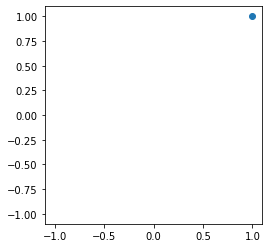

In [133]:
_, ax = plt.subplots()
p = Point(1,1)
p.draw(ax)
plt.show()

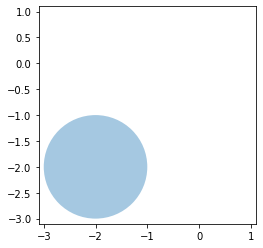

In [134]:
_, ax = plt.subplots()
p = Point(-2,-2)
c = Circle(p, 1)
c.draw(ax)
plt.show()

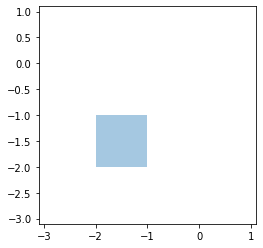

In [135]:
_, ax = plt.subplots()
p = Point(-2,-2)
s = Square(p, 1)
s.draw(ax)
plt.show()

False


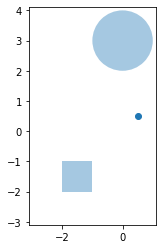

In [136]:
_, ax = plt.subplots()
p1 = Point(-2,-2)
s = Square(p1, 1)
p2 = Point(0, 3)
c = Circle(p2, 1)
p3 = Point(0.5, 0.5)
print(c.is_inside(p3))
p3.draw(ax)
c.draw(ax)
s.draw(ax)
plt.show()

False
True


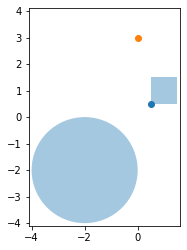

In [137]:
_, ax = plt.subplots()
p1 = Point(-2,-2)
p2 = Point(0, 3)
p3 = Point(0.5, 0.5)
u = Union([Square(p3, 1), Circle(p1, 2)])
print(u.is_inside(p2))
print(u.is_inside(p3))
p3.draw(ax)
p2.draw(ax)
u.draw(ax)
plt.show()

### Задание 1. Декораторы

Исключения в Python бывают разных типов: ValueError, TypeError, RuntimeError и др.
Все исключения унаследованы от класса BaseException.

Для того, чтобы поймать и корректно обработать исключение, нужно код, который потенциально может его вызвать, поместить в блок try ... except
```

try:
    # do something that should raise exception
except тип_исключения as e:
    # do something with exception

```

При возникновении исключения в коде между try и except, когда тип исключения совпадает или является наследником 'тип_исключения', то управление передается в блок except.

Требуется:
1. написать декоратор, который будет выводить на экран и в файл 'log.txt' в режиме дополнения информацию о возникновении или не возникновении исключений в декорируемой функции.
2. протестировать декоратор нарочно вызывая исключения в декорируемой функции при помощи raise. Например:

```
raise ValueError("В функцию передано некорректное значение")
raise TypeError("Тип аргумента функции не поддерживается")
и др.
```


In [186]:
def logger(func): 
    def wrapper(*args, **kwargs):
        ans = None
        try:
            ans = func(*args, **kwargs)
        except BaseException as e:
            with open('log.txt', 'at') as f:
                f.write(f"Function {func.__name__:^15} FAILED on arguments: {args} {kwargs}.  {type(e).__name__}: {e}\n")
            return e
        else:
            with open('log.txt', 'at') as f:
                f.write(f"Function {func.__name__:^15} SUCCEED on arguments: {args} {kwargs}. \n")
        return ans
            

    return wrapper

@logger
def power(a, b):
    if b == 0 and a==0:
        raise ValueError("0 to the power of 0 is undefined")
    return(a ** b)

@logger
def print_string(s):
    if type(s) != str:
         raise ValueError("Only string can pe printed")
    print(s)

In [187]:
power(b=2, a=3)
power(0, 0)
power(0, 1)

0

In [188]:
print_string(s="")
print_string("test")
print_string(2)


test


ValueError('Only string can pe printed')

In [189]:
!TYPE log.txt

Function      power      SUCCEED on arguments: () {'b': 2, 'a': 3}. 
Function      power      FAILED on arguments: (0, 0) {}.  ValueError: 0 to the power of 0 is undefined
Function      power      SUCCEED on arguments: (0, 1) {}. 
Function  print_string   SUCCEED on arguments: () {'s': ''}. 
Function  print_string   SUCCEED on arguments: ('test',) {}. 
Function  print_string   FAILED on arguments: (2,) {}.  ValueError: Only string can pe printed
